### importing the required libaries

In [58]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


### loading the data to dataframes

In [59]:
df1=pd.read_csv('fma-rock-vs-hiphop.csv')
df1.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
track_id         17734 non-null int64
bit_rate         17734 non-null int64
comments         17734 non-null int64
composer         166 non-null object
date_created     17734 non-null object
date_recorded    1898 non-null object
duration         17734 non-null int64
favorites        17734 non-null int64
genre_top        17734 non-null object
genres           17734 non-null object
genres_all       17734 non-null object
information      482 non-null object
interest         17734 non-null int64
language_code    4089 non-null object
license          17714 non-null object
listens          17734 non-null int64
lyricist         53 non-null object
number           17734 non-null int64
publisher        52 non-null object
tags             17734 non-null object
title            17734 non-null object
dtypes: int64(8), object(13)
memory usage: 2.8+ MB


In [61]:
df2 = pd.read_json('echonest-metrics.json', precise_float=True)
df2.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,track_id,valence
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,2,0.576661
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,3,0.269240
10,0.235506,0.438672,0.487752,0.716122,0.070359,0.047298,120.790,145,0.650452
100,0.977282,0.468808,0.134975,0.687700,0.105381,0.073124,119.646,341,0.430707
1000,0.081256,0.897197,0.367886,0.104474,0.085845,0.041271,100.744,3457,0.749293


In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 9999
Data columns (total 9 columns):
acousticness        13129 non-null float64
danceability        13129 non-null float64
energy              13129 non-null float64
instrumentalness    13129 non-null float64
liveness            13129 non-null float64
speechiness         13129 non-null float64
tempo               13129 non-null float64
track_id            13129 non-null int64
valence             13129 non-null float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


### merging two data frames

In [63]:
df=pd.merge(df2, df1[['track_id', 'genre_top']], on='track_id')
df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,track_id,valence,genre_top
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,2,0.576661,Hip-Hop
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,3,0.269240,Hip-Hop
2,0.977282,0.468808,0.134975,0.687700,0.105381,0.073124,119.646,341,0.430707,Rock
3,0.953349,0.498525,0.552503,0.924391,0.684914,0.028885,78.958,46204,0.430448,Rock
4,0.613229,0.500320,0.487992,0.936811,0.637750,0.030327,112.667,46205,0.824749,Rock


### checking the types of data

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
acousticness        4802 non-null float64
danceability        4802 non-null float64
energy              4802 non-null float64
instrumentalness    4802 non-null float64
liveness            4802 non-null float64
speechiness         4802 non-null float64
tempo               4802 non-null float64
track_id            4802 non-null int64
valence             4802 non-null float64
genre_top           4802 non-null object
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


### checking null values

In [65]:
missing_values_counts=df.isnull().sum()
missing_values_counts

acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
track_id            0
valence             0
genre_top           0
dtype: int64

### checking for duplicated rows

In [66]:
duplicated_rows=df[df.duplicated]
duplicated_rows.shape

(0, 10)

#### Pairwise relationships between continuous variables
We typically want to avoid using variables that have strong correlations with each other -- hence avoiding feature redundancy -- for a few reasons:
 - To keep the model simple and improve interpretability (with many features, we run the risk of overfitting).
 - When our datasets are very large, using fewer features can drastically speed up our computation time.
To get a sense of whether there are any strongly correlated features in our data, we will use built-in functions in the pandas package.

In [67]:
corr_metrics = df.corr()
corr_metrics.style.background_gradient()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,track_id,valence
acousticness,1,-0.0289537,-0.281619,0.19478,-0.0199914,0.072204,-0.0263097,-0.372282,-0.0138406
danceability,-0.0289537,1,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.0494541,0.473165
energy,-0.281619,-0.242032,1,0.0282377,0.113331,-0.109983,0.195227,0.140703,0.0386027
instrumentalness,0.19478,-0.255217,0.0282377,1,-0.0910218,-0.366762,0.022215,-0.275623,-0.219967
liveness,-0.0199914,-0.106584,0.113331,-0.0910218,1,0.0411725,0.00273169,0.0482307,-0.0450931
speechiness,0.072204,0.276206,-0.109983,-0.366762,0.0411725,1,0.00824055,-0.0269951,0.149894
tempo,-0.0263097,-0.242089,0.195227,0.022215,0.00273169,0.00824055,1,-0.0253918,0.0522212
track_id,-0.372282,0.0494541,0.140703,-0.275623,0.0482307,-0.0269951,-0.0253918,1,0.0100698
valence,-0.0138406,0.473165,0.0386027,-0.219967,-0.0450931,0.149894,0.0522212,0.0100698,1


####  Normalizing the feature data

In [68]:
# our features 
features = df.drop(['track_id', 'genre_top'], axis=1)
features.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,0.977282,0.468808,0.134975,0.687700,0.105381,0.073124,119.646,0.430707
3,0.953349,0.498525,0.552503,0.924391,0.684914,0.028885,78.958,0.430448
4,0.613229,0.500320,0.487992,0.936811,0.637750,0.030327,112.667,0.824749


In [69]:
# our labels
labels = df['genre_top']
labels.head()

0    Hip-Hop
1    Hip-Hop
2       Rock
3       Rock
4       Rock
Name: genre_top, dtype: object

In [70]:
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
pd.DataFrame(scaled_features).head()

,0,1,2,3,4,5,6,7
0,-0.191210,1.304420,0.038316,-1.576494,-0.068755,0.373034,1.153979,0.462287
1,-0.306036,0.501886,0.788176,-1.599809,-0.545463,2.446155,0.007914,-0.690811
2,1.331757,0.175777,-2.008607,0.222085,-0.548779,-0.217608,-0.207122,-0.085167
3,1.266742,0.337737,-0.297606,0.850834,3.300761,-0.520786,-1.403866,-0.086139
4,0.342755,0.347522,-0.561966,0.883828,2.987475,-0.510901,-0.412394,1.392836


#### Principal Component Analysis on our scaled data

In [71]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_features)
exp_variance = pca.explained_variance_ratio_
pd.DataFrame(exp_variance)


,0
0,0.242977
1,0.180443
2,0.136503
3,0.129941
4,0.110562
5,0.083022
6,0.069238
7,0.047313


#### Plot explained variance

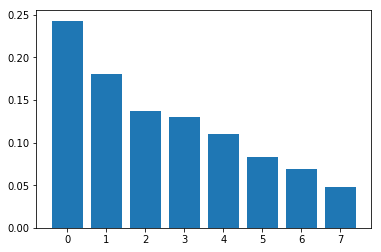

In [73]:
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
plt.show()

#### Further visualization of PCA


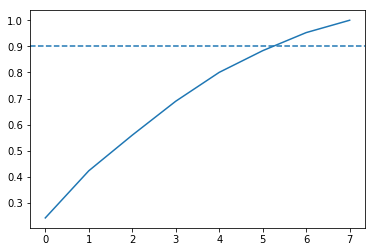

In [74]:
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.90.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')
n_components = 6

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(scaled_features)
pca_projection = pca.transform(scaled_features)


#### Train a decision tree to classify genre

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, 
                                                                            labels,
                                                                            random_state=10)
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_features)
tree.score(test_features, test_labels)

0.8709408825978351